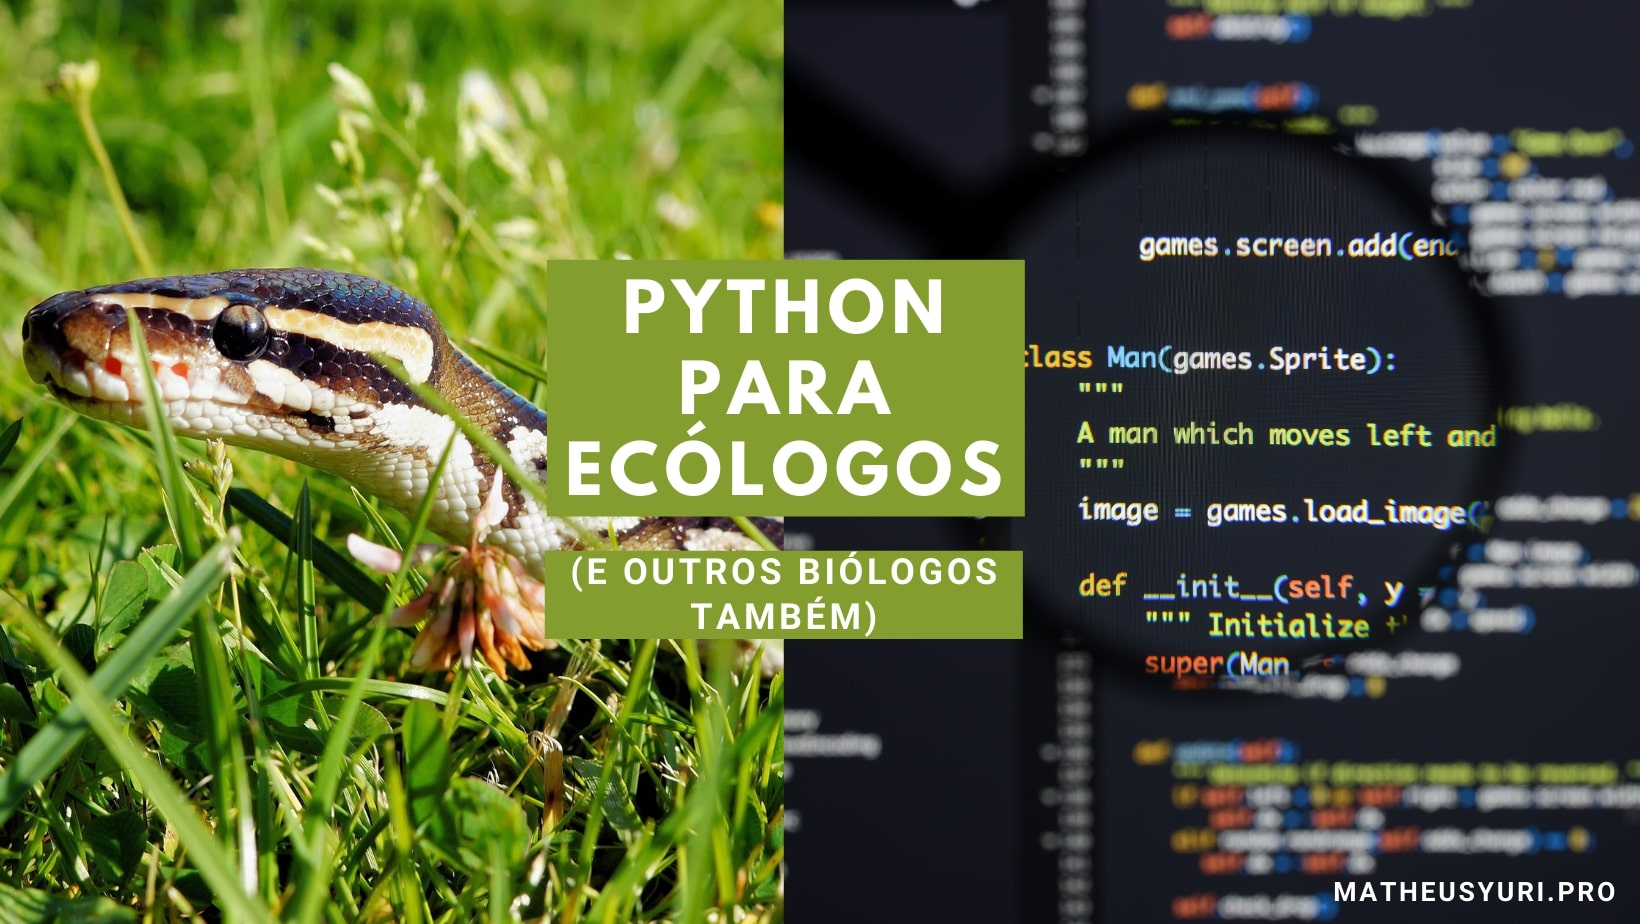
# Notebook Prático 1 - Python para Ecólogos (e outros biólogos também)

Olá, pessoa!

Este é o primeiro notebook prático da série **Python para Ecólogos (e outros biólogos também)**. A partir desse notebook Jupyter, você poderá acompanhar de forma prática e interativa os assuntos abordados nos [posts do blog](https://blog.matheusyuri.pro/series/python-biologia). Você pode acompanhar o texto e ir testando cada bloco de código nesse notebook. Se preferir, você pode também fazer o download do arquivo `.ipynb` e abri-lo no Jupyter Notebook instalado na sua máquina; apenas não esqueça de se certificar que todas as bibliotecas a serem usadas nos notebooks da série estão também instaladas no seu computador.

## Importando a biblioteca pandas e o dataset de exemplo

In [ ]:
import pandas as pd
df = pd.read_csv("https://github.com/mhalmenschlager/python-biologia/raw/main/archives/surveys.csv")

## Primeiras informações sobre o *dataframe*

Carregado o *dataset* e separados os dados que utilizaremos no notebook, é momento de conhecer as informações do frame mais a fundo. Para tanto, usaremos as funções `info()` para saber os *tipos de dados* existentes nesse *dataframe*, e a função `head()` para saber como os dados estão dispostos na tabela.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35549 entries, 0 to 35548
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_id        35549 non-null  int64  
 1   month            35549 non-null  int64  
 2   day              35549 non-null  int64  
 3   year             35549 non-null  int64  
 4   plot_id          35549 non-null  int64  
 5   species_id       34786 non-null  object 
 6   sex              33038 non-null  object 
 7   hindfoot_length  31438 non-null  float64
 8   weight           32283 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 2.4+ MB


In [ ]:
df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


## Dicionário de variáveis

Este é um aspecto importante do notebook, onde você poderá informar quais são os rótulos (*labels*) das variáveis que estiver utilizando. Basicamente, pode ser uma lista simples com os nomes das variáveis no *dataframe*, com seus respectivos significados. Assim, teremos conhecimento de que variáveis estaremos utilizando para fazer análises em cada bloco de código do notebook.

Neste caso, as variáveis estão dispostas da seguinte maneira:

- `record_id`: ID único para amostra
- `month`: Mês de observação
- `day`: Dia de observação
- `year`:	Ano de observação
- `plot_id`:	ID de um local em particular
- `species_id`:	ID de espécie (código com dois caracteres)
- `sex`: Sexo do animal ("M" ou "F")
- `hindfoot_length`: Comprimento do retropé (em mm)
- `weight`:	peso do animal (em gramas)

## Como fazer resumo estatístico de uma coluna/variável

É simples fazer o resumo estatístico de uma coluna/variável, bastando usar a função `describe()`:

In [ ]:
df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

## Algumas estatísticas de uma determinada variável

Com a função `describe()`, temos um resumo estatísticos com algumas medidas de tendência central e dispersão de uma determinada variável. Mas, de todas essas, como proceder se queremos saber apenas de uma ou outra? Basta utilizar as funções referentes às medidas que se quer.

In [ ]:
df['weight'].mean() #Média

42.672428212991356

In [ ]:
df['weight'].std() #Desvio-padrão

36.63125947458399

## Agrupamentos no pandas

In [ ]:
df['sex'].value_counts() #Contagem de amostras de acordo com o sexo

M    17348
F    15690
Name: sex, dtype: int64

In [ ]:
df_sex = df.groupby('sex') #Agrupamento por sexo
df_sex.describe() #Resumo estatístico

record_id                                   ... weight                   
        count          mean           std  min  ...    25%   50%   75%    max
sex                                             ...                          
F     15690.0  18036.412046  10423.089000  3.0  ...   20.0  34.0  46.0  274.0
M     17348.0  17754.835601  10132.203323  1.0  ...   20.0  39.0  49.0  280.0

[2 rows x 56 columns]

In [ ]:
df.groupby('sex').count() #Quantidade de amostras

,record_id,month,day,year,plot_id,species_id,hindfoot_length,weight
sex,,,,,,,,
F,15690,15690,15690,15690,15690,15690,14894,15303
M,17348,17348,17348,17348,17348,17348,16476,16879


In [ ]:
df.groupby('sex')['weight'].mean() #Média dos pesos das amostras, de acordo com o sexo

sex
F    42.170555
M    42.995379
Name: weight, dtype: float64

## Filtragem do conjunto de dados por fatiamento

Isso pode servir para tanto filtrar dados que queremos analisar, quanto criar *subsets* com esses filtros para utilizar no futuro.

In [ ]:
df_linha = df[0:7] #Linha de início (0): linha final (6)+1
df_linha

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN


In [ ]:
df_coluna = df['weight'] #Uma coluna
df_coluna

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
35544     NaN
35545     NaN
35546    14.0
35547    51.0
35548     NaN
Name: weight, Length: 35549, dtype: float64

In [ ]:
df_coluna = df[['weight', 'sex']] #Mais de uma coluna
df_coluna

,weight,sex
0,NaN,M
1,NaN,M
2,NaN,F
3,NaN,M
4,NaN,M
...,...,...
35544,NaN,NaN
35545,NaN,NaN
35546,14.0,F
35547,51.0,M


## Que tal fazer você mesmo?

### Primeiras visualizações com pandas

**Desafio 1:** Vimos aqui que a função `head()` aponta as cinco primeiras entradas do nosso *dataframe*. Há também uma outra função relacionada a essa chamada `tail()` O que ela faz?

In [ ]:
#@title Desafio 1:
df.tail()

**Desafio 2:** Ainda sobre a função `head()`: se quisermos exibir mais de 5 linhas, o que devemos fazer? Será que podemos fazer o mesmo para exibir menos que isso?

In [ ]:
#@title Desafio 2:
df.head(4) #Apenas mude o número dentro de () para mudar a quantidade de linhas.


### Agrupamentos no pandas

Com o mesmo *dataframe* podemos então comparar mais medidas agrupando as amostras por sexo. Será que você consegue comparar essa categoria:

- por medianas de peso?
- por médias de comprimento do retropé (hindfoot)? E qual o máximo do comprimento para cada sexo?

In [ ]:
#@title Medianas de peso
df.groupby('sex')['weight'].median()

In [ ]:
#@title Médias de comprimento do retropé
df.groupby('sex')['hindfoot_length'].mean()

In [ ]:
#@title Máximo do comprimento do retropé
df.groupby('sex')['hindfoot_length'].max()